In [ ]:
%load_ext autoreload
%autoreload 2

import builtins
import IPython.lib.deepreload
builtins.reload = IPython.lib.deepreload.reload # type: ignore

In [6]:
import math

import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
from sklearn.cluster import SpectralClustering
import swcgeom
from swcgeom.analysis import draw
from swcgeom.utils import palette

In [83]:
color_map = {
    0: palette.momo,
    1: palette.mizugaki,
    2: palette.kuchiba,
    3: palette.sumire,
    4: palette.aotake,
    5: palette.tsuyukusa,
    6: palette.kimirucha,
    7: palette.benikeshinezumi,
}

def fit_and_draw(tree, adjacency_matrix, n_clusters):
    cluster = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
    y_pred = cluster.fit_predict(adjacency_matrix)

    new_tree = tree.copy()
    new_tree.ndata["type"] = y_pred

    fig, (ax0, ax1) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)
    _ = draw(tree, ax=ax0)
    _ = draw(new_tree, ax=ax1, color=color_map)

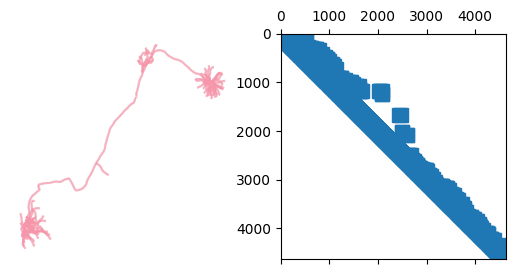

In [17]:
swc1 = "101711-10_4p5-of-16_initial.CNG.swc"
swc2 = "101711-11_16-of-16_initial.CNG.swc"

tree = swcgeom.Tree.from_swc(swc)
tree_adjacency_matrix = tree.get_adjacency_matrix()

fig, (ax0, ax1) = plt.subplots(1, 2)
_ = draw(tree, ax=ax0)
_ = ax1.spy(tree_adjacency_matrix)

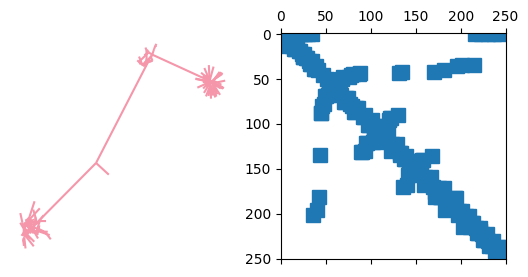

In [88]:
branch_tree = swcgeom.BranchTree.from_tree(tree)
branch_tree_adjacency_matrix = branch_tree.get_adjacency_matrix()

fig, (ax0, ax1) = plt.subplots(1, 2)
_ = draw(branch_tree, ax=ax0)
_ = ax1.spy(branch_tree_adjacency_matrix)

/home/celeste/src/swcgeom/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:233: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


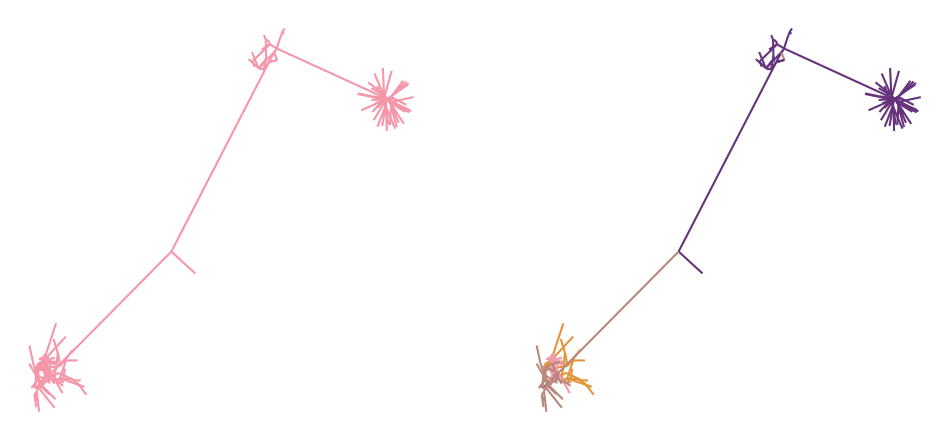

In [84]:
fit_and_draw(branch_tree, branch_tree_adjacency_matrix, 4)

In [85]:
def get_euclidean_distance(tree, pid, id):
    xyz = swcgeom.Tree.Node(tree, pid).xyz() - swcgeom.Tree.Node(tree, id).xyz()
    return np.linalg.norm(xyz).item()

def get_euclidean_distance_matrix(tree):
    distance = np.array([
        [get_euclidean_distance(tree, pid, id) for id in tree.id()[1:]]
        for pid in tree.pid()[1:]
    ])
    distance = np.concatenate([distance, np.zeros((1, distance.shape[1]))])
    distance = np.concatenate([distance, np.zeros((distance.shape[0], 1))], axis=1)
    return distance

euclidean_distance_matrix = get_euclidean_distance_matrix(branch_tree)
euclidean_distance_adjacency = branch_tree_adjacency_matrix.toarray().dot(euclidean_distance_matrix)


/home/celeste/src/swcgeom/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:233: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/home/celeste/src/swcgeom/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


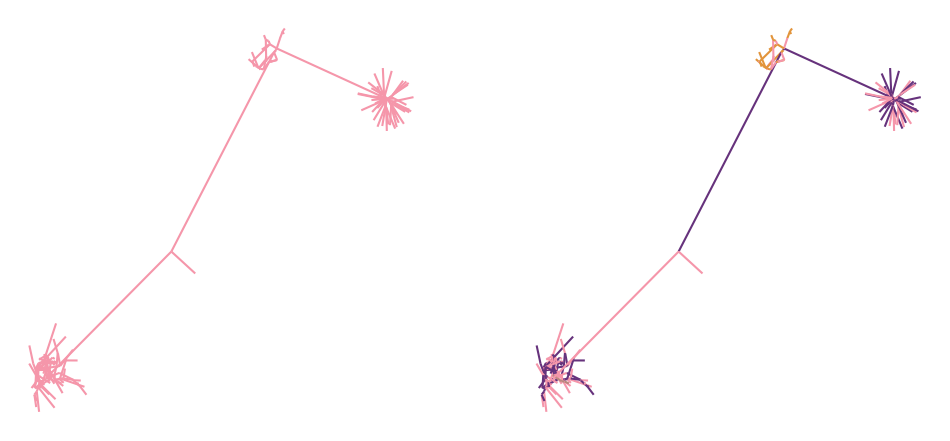

In [87]:
fit_and_draw(branch_tree, euclidean_distance_adjacency, 4)